# Decision tree Practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Load the iris dataset and make Data Frame
# iris = datasets.load_iris()
# iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# from csv
col_names = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris_df = pd.read_csv('Iris.csv') #names = col_names if not in CSV
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### divide given columns into two types of variables:
dependent(or target variable) and independent variable(or feature variables)

In [2]:
# features used to aim for target
feature_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = iris_df[feature_cols]

# target variable
y = iris_df.Species

### Divide the data set
Need a training set to help the model learn, and test set to see how well it learned

In [3]:
# Split method, 0.3 == 30% of data saved for testing, chooses randomly from set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Train the model in just three simple steps
see why data scientists everywhere hate him

In [9]:
# Create Decision Tree classifer object
# arguments for pruning
dtc = DecisionTreeClassifier(criterion="entropy", splitter = 'random', max_depth=3)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# predictions by model for y
y_pred = dtc.predict(X_test)

# compare to y_test to get accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### Visualize training tree model - DOWNGRADE SKLEARN!!

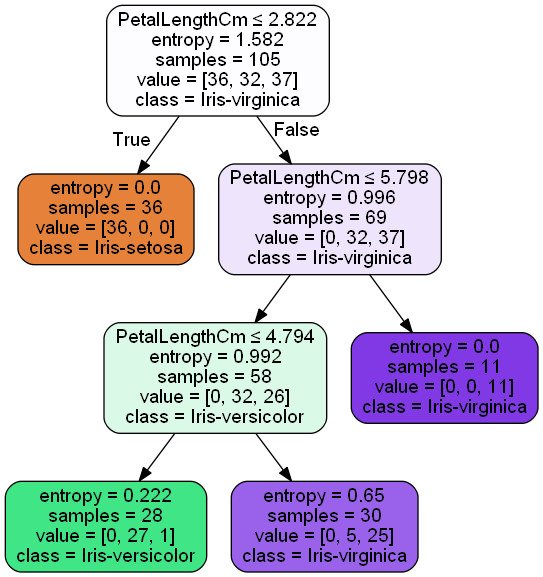

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# use trained decision tree model, feature columns, and clases in target col
export_graphviz(dtc, out_file = dot_data, filled=True, rounded=True, special_characters=True,
                feature_names = feature_cols,
                class_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'])

# creates image and then displays in Jupyter
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('flowers.png')
Image(graph.create_png())